# DATA ANALSYSIS
Loading and toying with the data set

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyddm
from pyddm import Model, Fittable, Fitted, Sample
from pyddm.models import Drift, Noise, Bound, Overlay, LossFunction
from pyddm.functions import fit_model
from pyddm.models import ICPointSourceCenter, InitialCondition, ICUniform
from pyddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNone, OverlayNonDecision, OverlayUniformMixture
from pyddm.plot import model_gui_jupyter
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind, mannwhitneyu

Number of outliers in the dataframe: 6
      subjects  S  prime  R        rt
3351         3  1      1  1  2.726970
5511         3  1      1  1  2.060569
3331         7  1      0  0  2.555356
2444         8  1      1  0  0.199197
3020         8  1      1  0  0.199295
1883        11  0      0  0  2.272151
Number of entries after removing outliers: 5514
mean: 0.4858135014300436


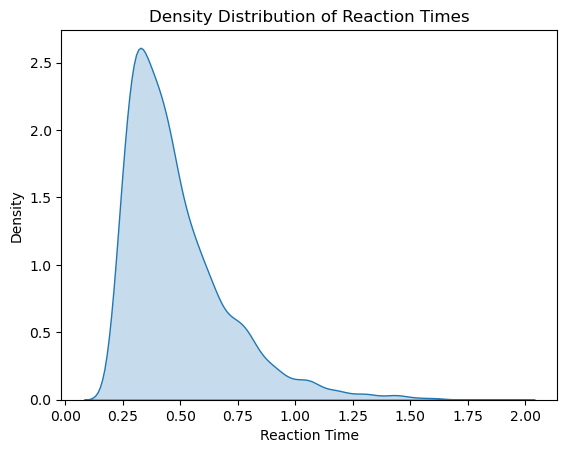

subjects  S  prime  R        rt
361          1  0      1  1  0.369526
2617         1  0      1  1  0.695785
3013         1  1      1  1  0.749988
1117         1  1      0  0  0.372379
2257         1  0      0  0  0.351478
...        ... ..    ... ..       ...
1860        12  0      1  0  0.285543
1932        12  0      0  0  0.293880
2640        12  1      1  1  0.321360
2628        12  0      1  0  0.333881
3624        12  1      0  0  0.323670

[5508 rows x 5 columns]

In [124]:


# Load dataset
df = pd.read_csv('dataset-23.tsv', sep='\t')

# Change categorical variables from 'dog' to 1 and 'cat' to 0 for columns 'R' and 'S' and 'prime'
df['R'] = df['R'].map({'dog': 1, 'cat': 0})
df['S'] = df['S'].map({'dog': 1, 'cat': 0})
df['prime'] = df['prime'].replace({'WOOF': 1, 'MEOW': 0})

"""Cleanse the data"""

# Check for missing entries in the dataframe
missing_entries = df.isnull().sum()
# print("Missing entries in each column:")
# print(missing_entries)
#no missing entries

# Check for duplicate entries in the dataframe  
duplicate_entries = df.duplicated().sum()
#print("Number of duplicate entries in the dataframe:", duplicate_entries)
#no duplicate entries

# Check for outliers in the dataframe
outliers = df[(df['rt'] < 0.2) | (df['rt'] > 2.0)]
print("Number of outliers in the dataframe:", outliers.shape[0])
print(outliers)

# Remove outliers from the dataframe
df= df[~df.index.isin(outliers.index)]
print("Number of entries after removing outliers:", df.shape[0])
#removed 6 outliers, should be fine as it is less than 1% of the data

print(f"mean: {df['rt'].mean()}")
# Plot the density distribution of all reaction times to get an overview
sns.kdeplot(df['rt'], fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times')
plt.show()
df.head(-6)

In [125]:
# Overview means of SPRs
agg1 = df.groupby(['S','prime', 'R','subjects'])['rt'].mean().reset_index()
agg1.groupby(['S','prime', 'R'])['rt'].mean()

S  prime  R
0  0      0    0.507304
          1    0.490133
   1      0    0.444767
          1    0.519059
1  0      0    0.509268
          1    0.485930
   1      0    0.435170
          1    0.548096
Name: rt, dtype: float64

T-statistic: 2.9217982282577335
P-value: 0.0035029687256975138
correct responses mean: 0.4915370855158659
incorrect responses mean: 0.47289571360256166


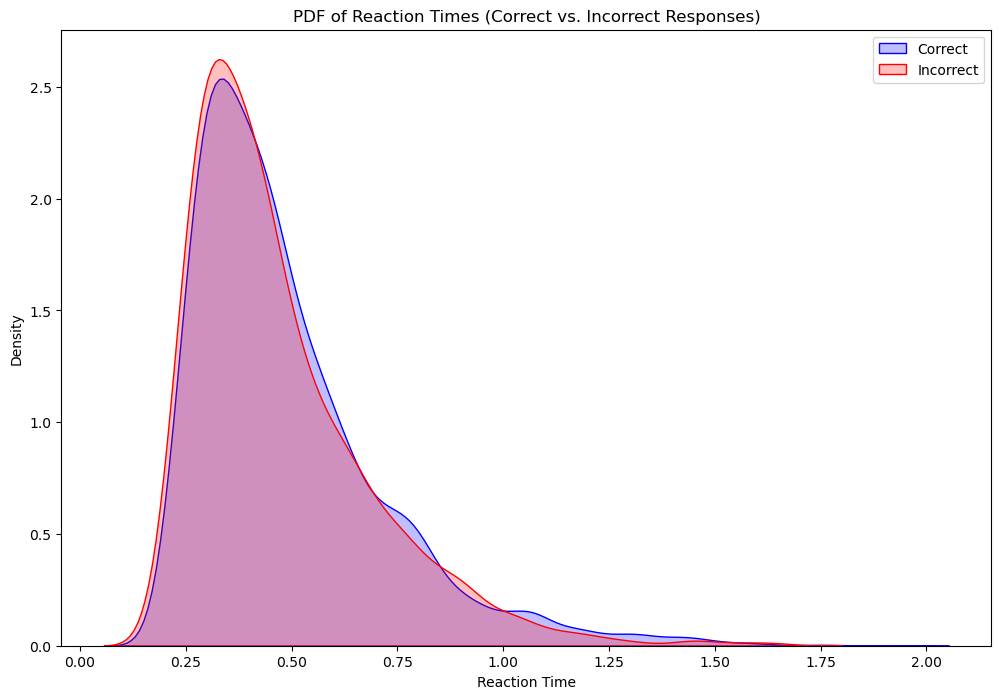

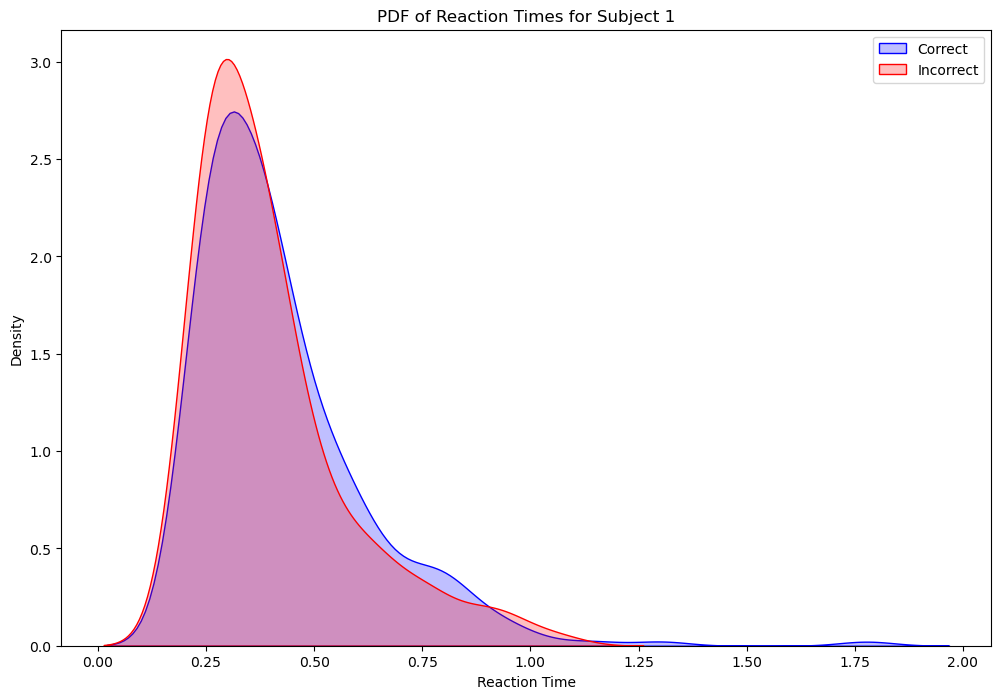

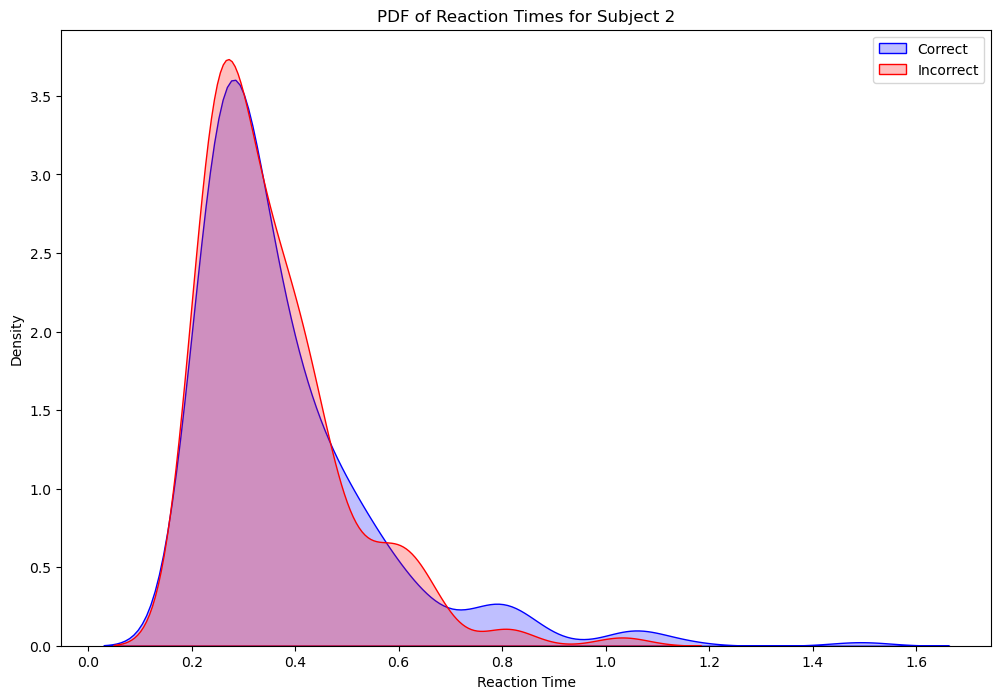

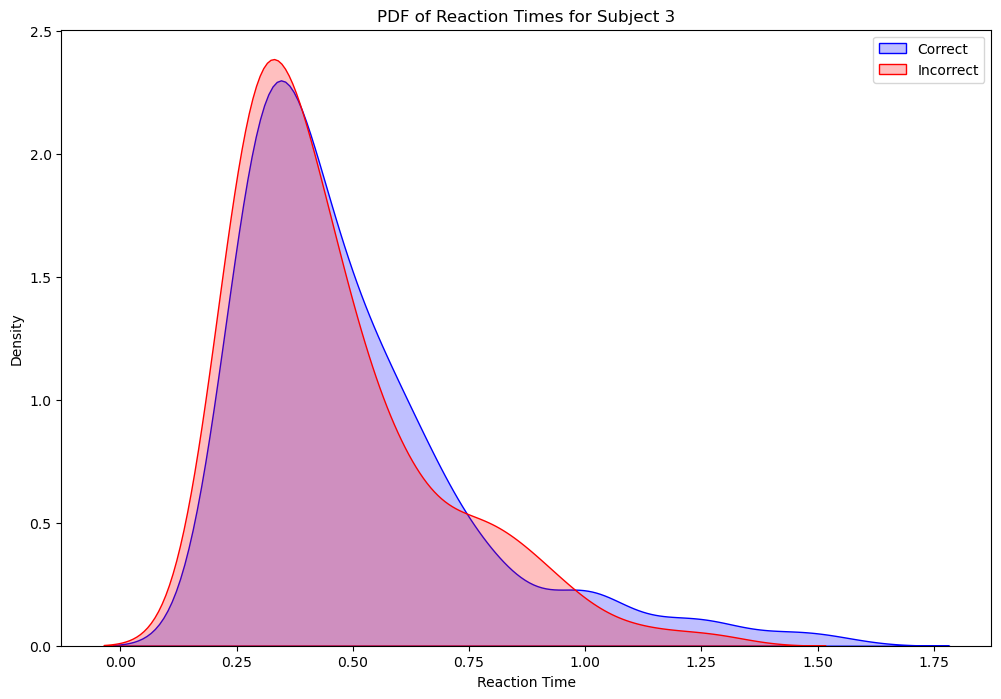

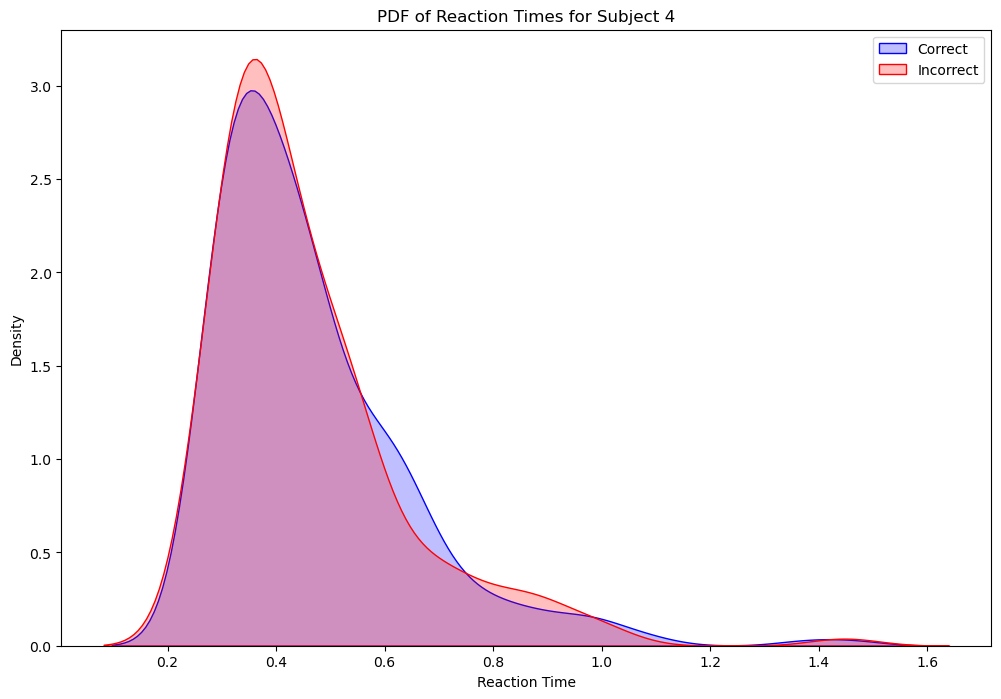

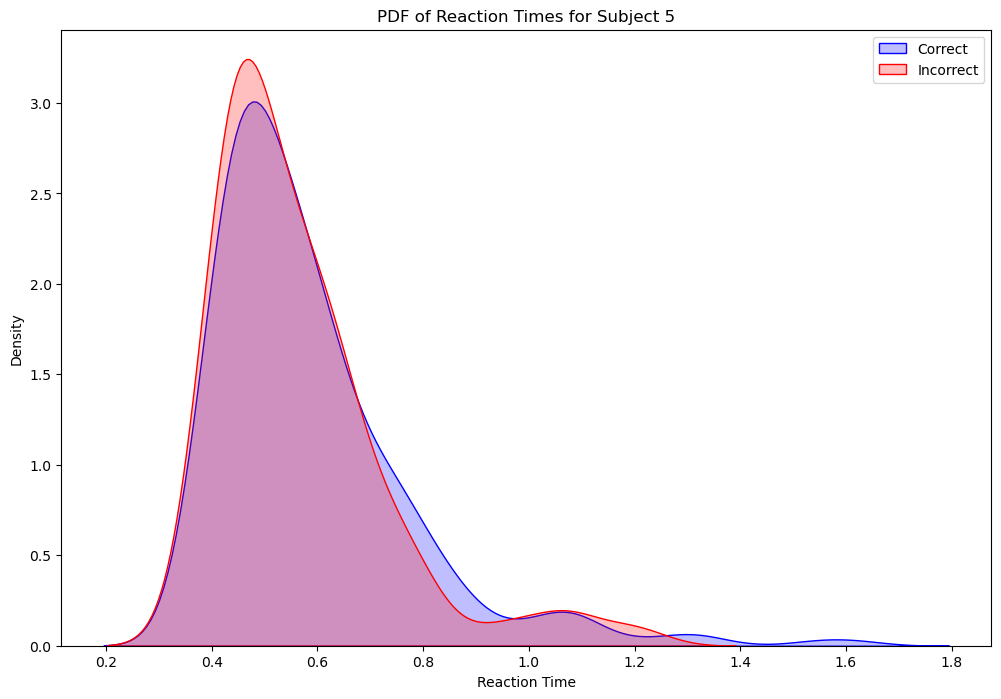

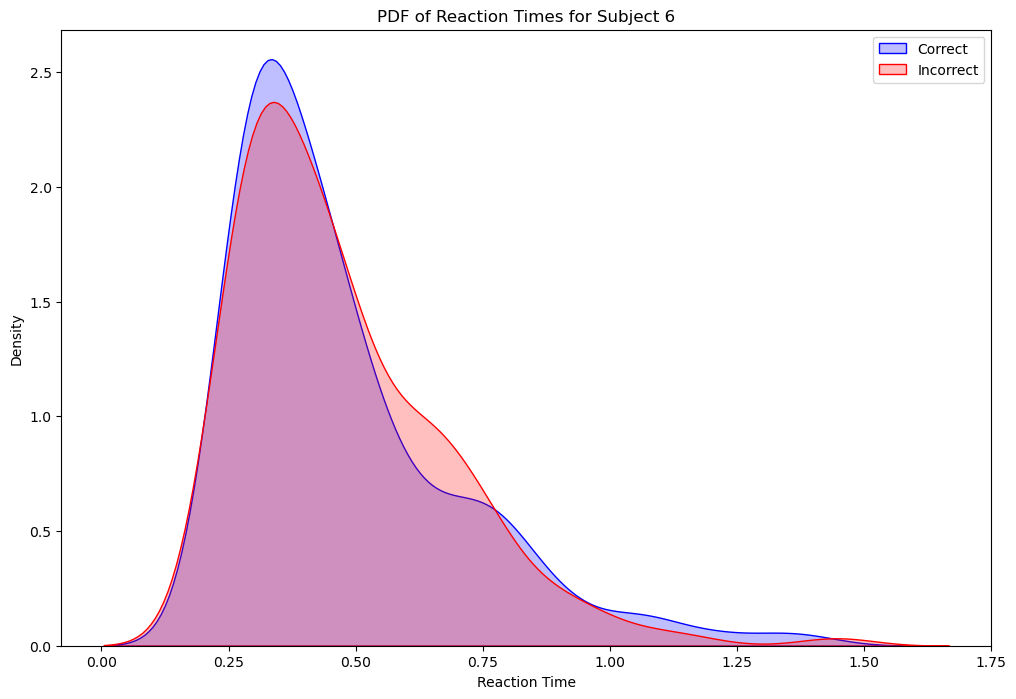

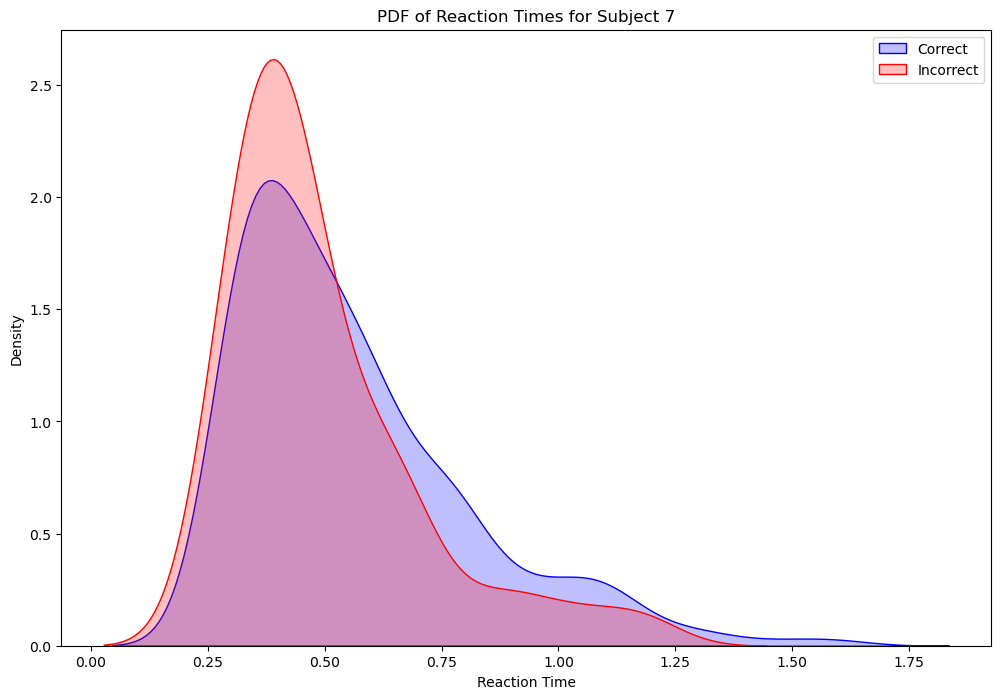

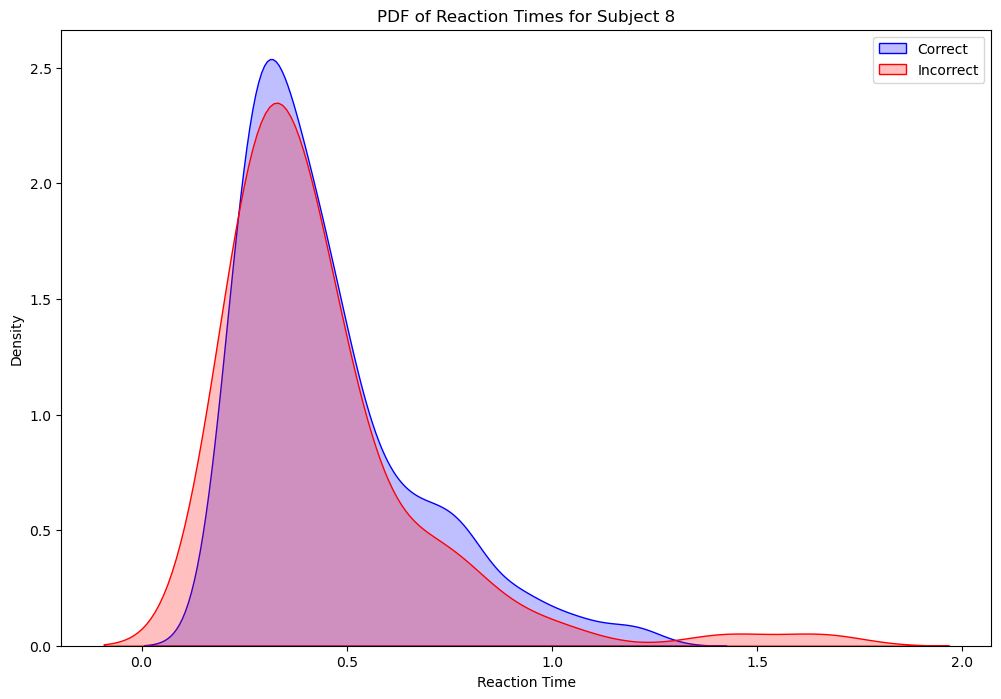

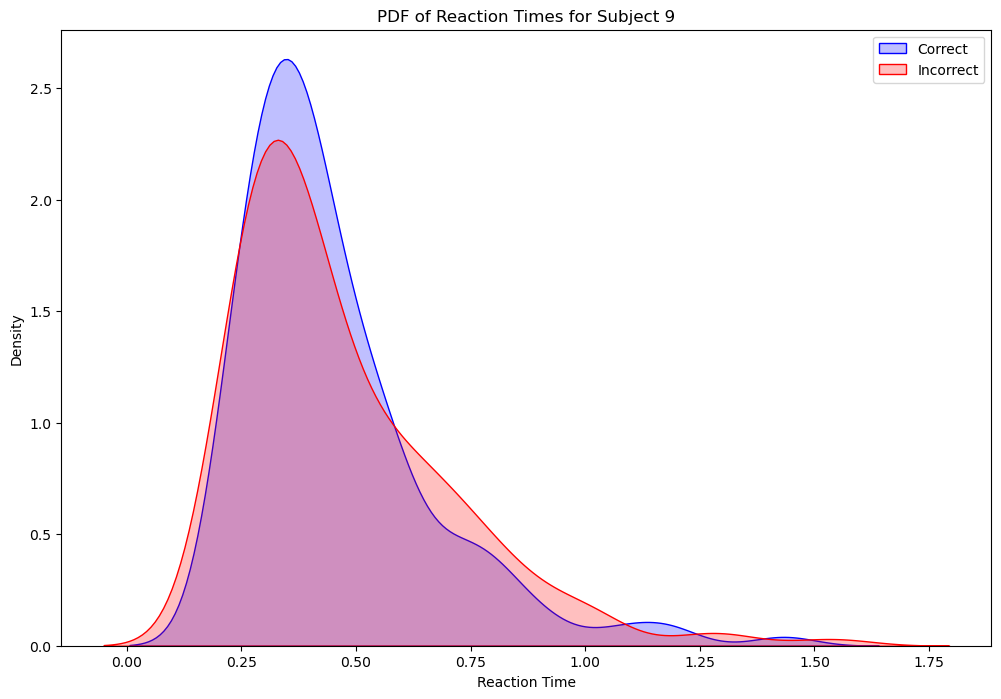

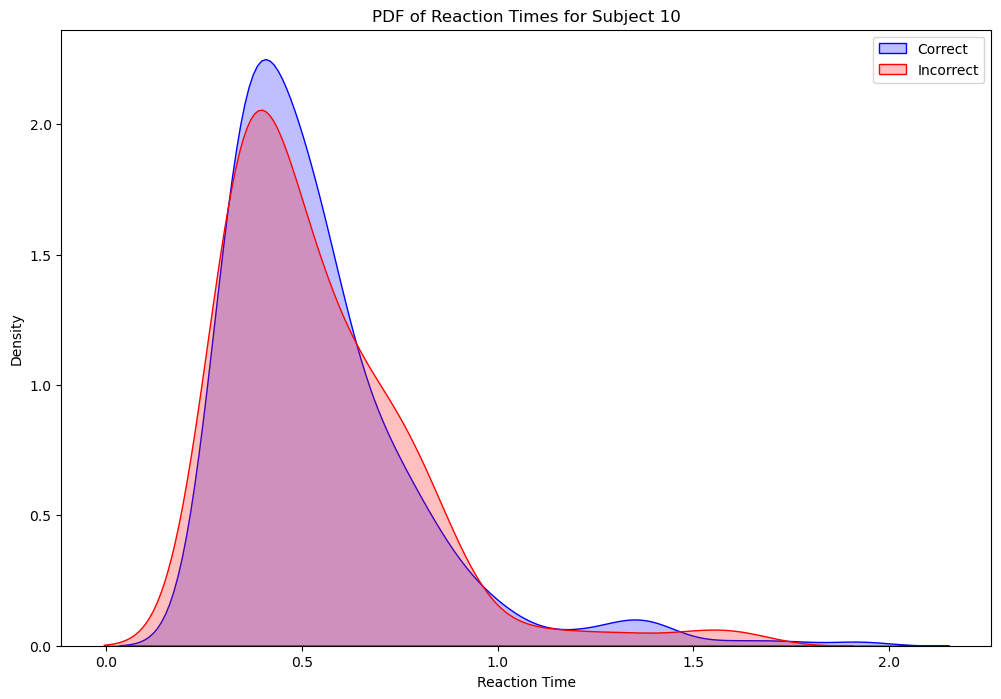

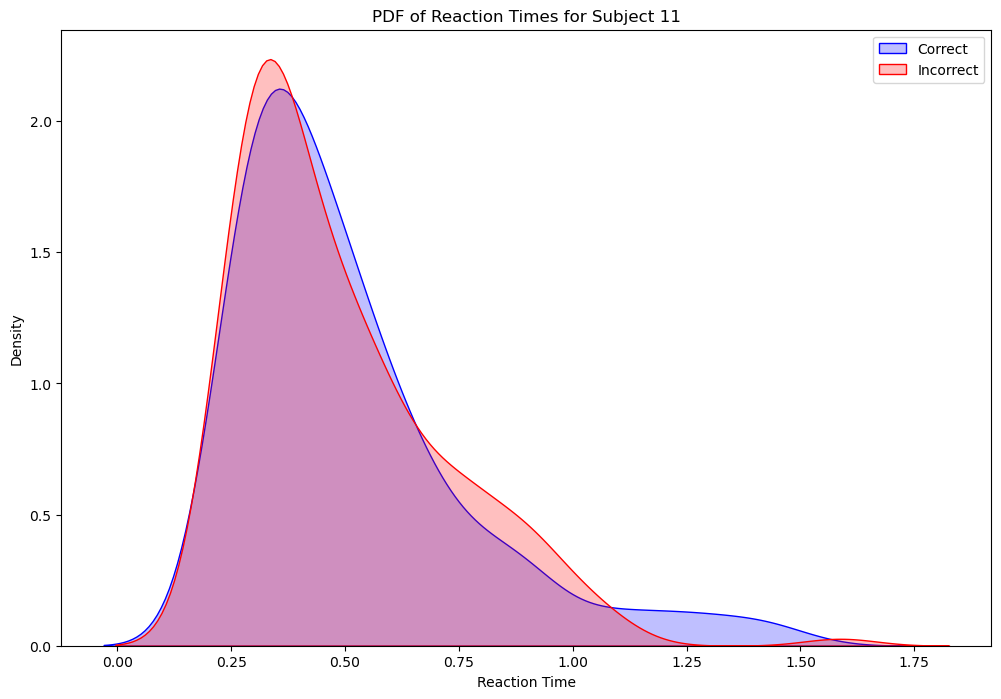

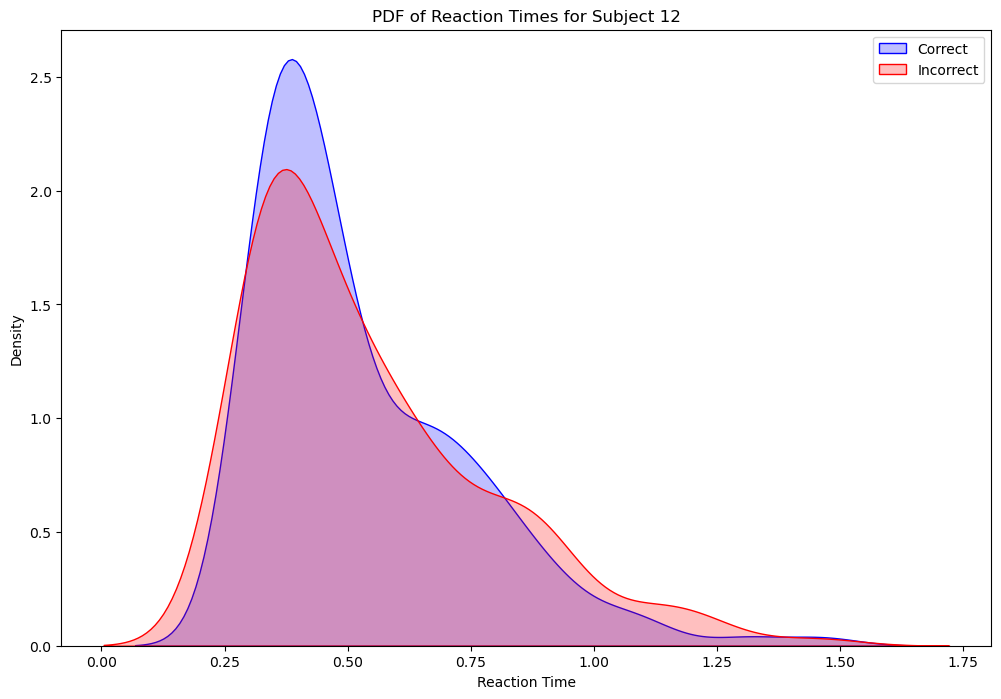

In [126]:

# Filter for correct responses
correct_responses = df[df['R'] == df['S']]

# Filter for incorrect responses
incorrect_responses = df[df['R'] != df['S']]

t_stat, p_value = ttest_ind(correct_responses['rt'], incorrect_responses['rt'], equal_var=False)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
#significant, but negligible difference in reaction times between correct and incorrect responses


# PDF of reaction times by subject for all incorrect vs. correct responses
print(f"correct responses mean: {correct_responses['rt'].mean()}")
print(f"incorrect responses mean: {incorrect_responses['rt'].mean()}")
plt.figure(figsize=(12, 8))
sns.kdeplot(data=correct_responses, x='rt', color='blue', fill=True)
sns.kdeplot(data=incorrect_responses, x='rt', color= 'red', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('PDF of Reaction Times (Correct vs. Incorrect Responses)')
plt.legend(['Correct', 'Incorrect'])
plt.show()


# PDF of reaction times by subject for correct vs. incorrect responses
for i in df.subjects.unique():
    plt.figure(figsize=(12, 8))
    sns.kdeplot(data=correct_responses[correct_responses["subjects"]==i], x='rt', color='blue', fill=True, label='Correct')
    sns.kdeplot(data=incorrect_responses[incorrect_responses["subjects"]==i], color='red', x='rt', fill=True, label='Incorrect')
    plt.xlabel('Reaction Time')
    plt.ylabel('Density')
    plt.title(f'PDF of Reaction Times for Subject {i}')
    plt.legend()
    plt.show()

T-statistic: -4.627362115665883
P-value: 3.7753413994064056e-06
cat responses mean: 0.46624621805209543
dog responses mean: 0.4915370855158659


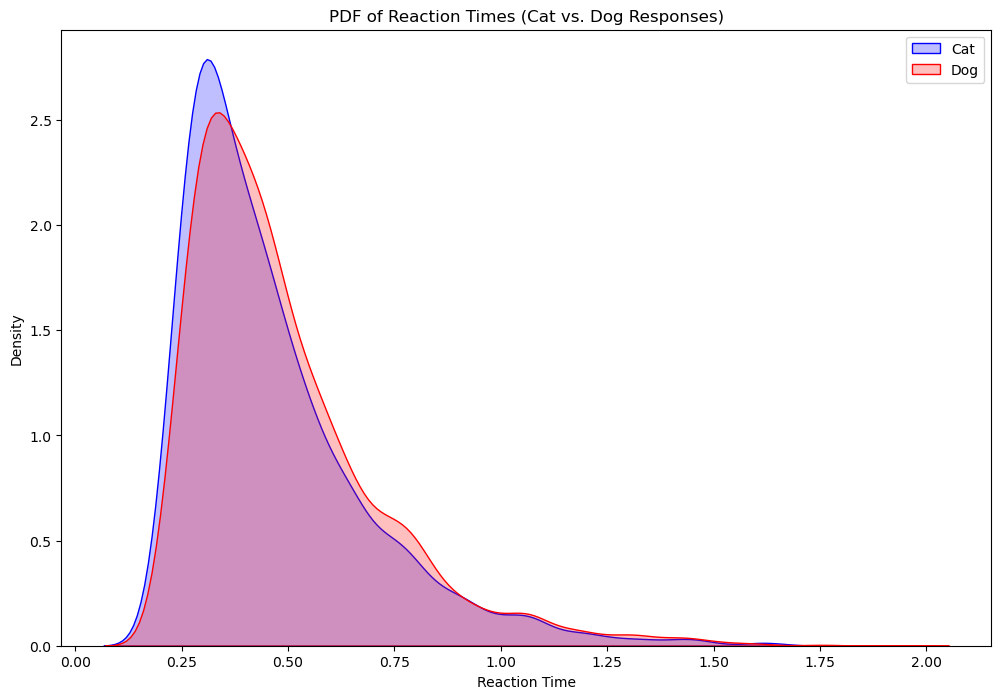

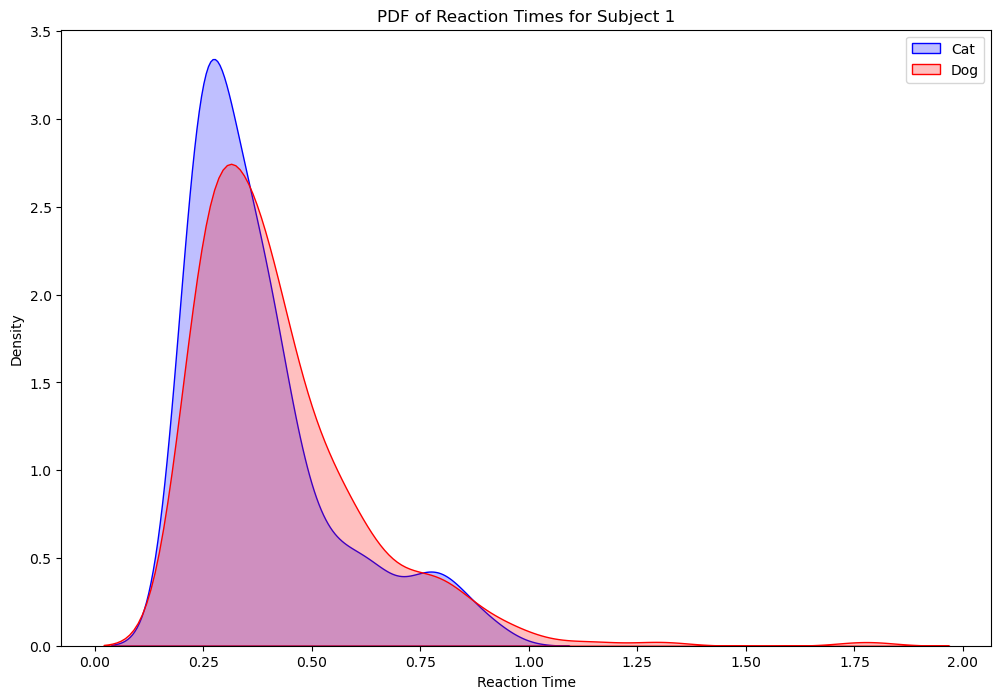

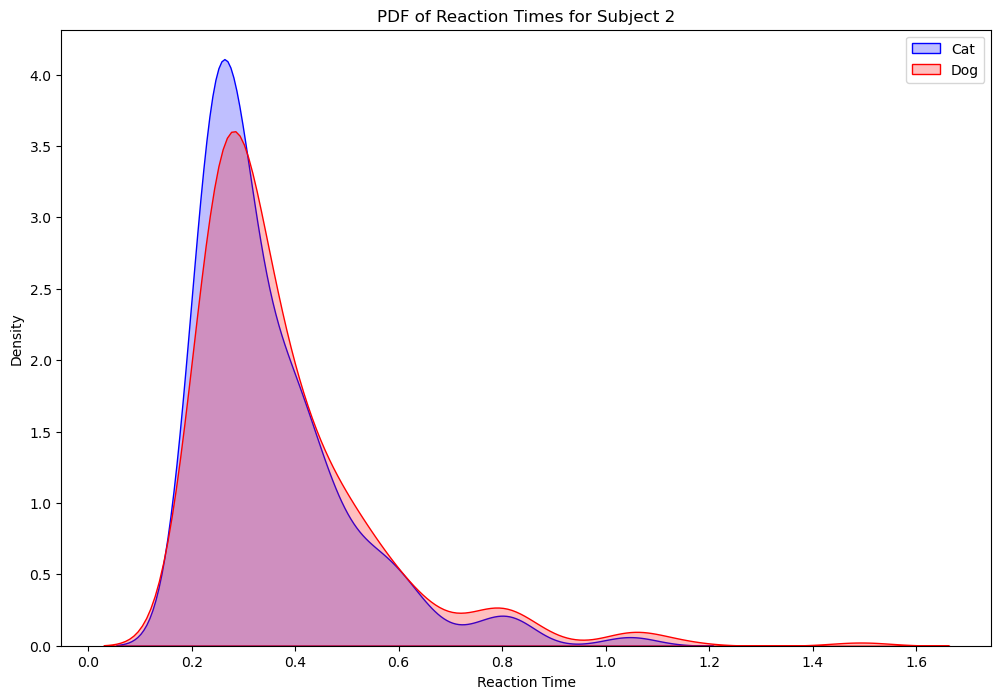

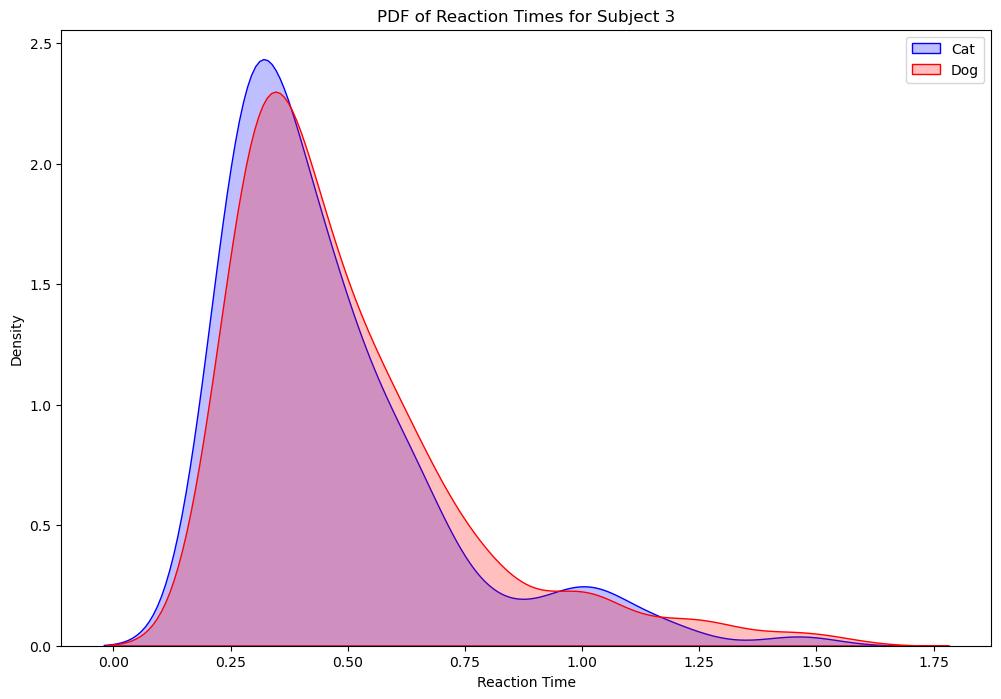

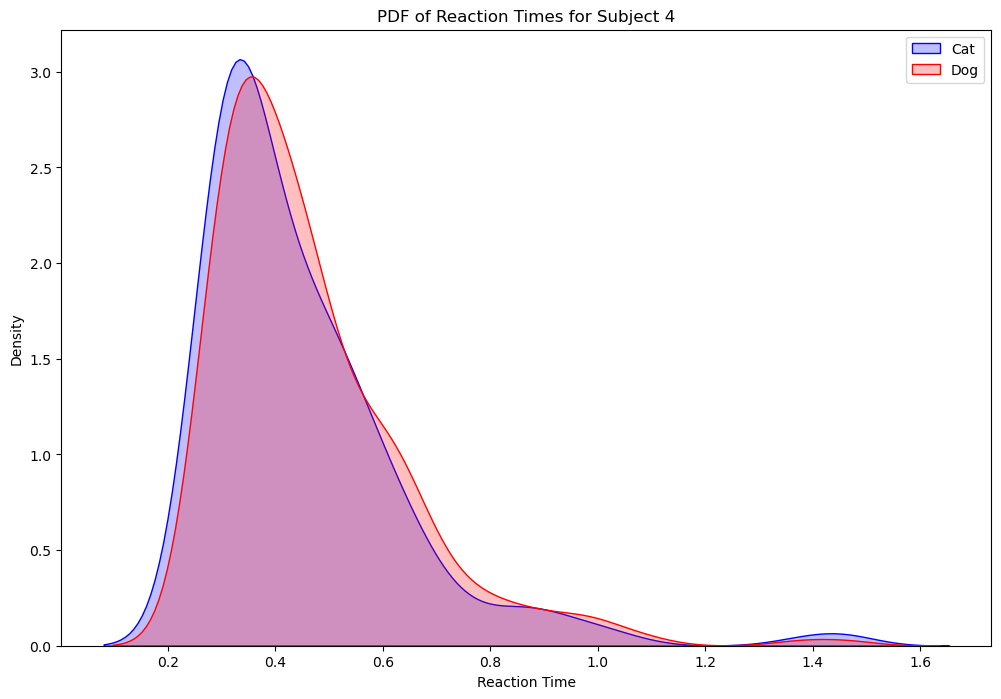

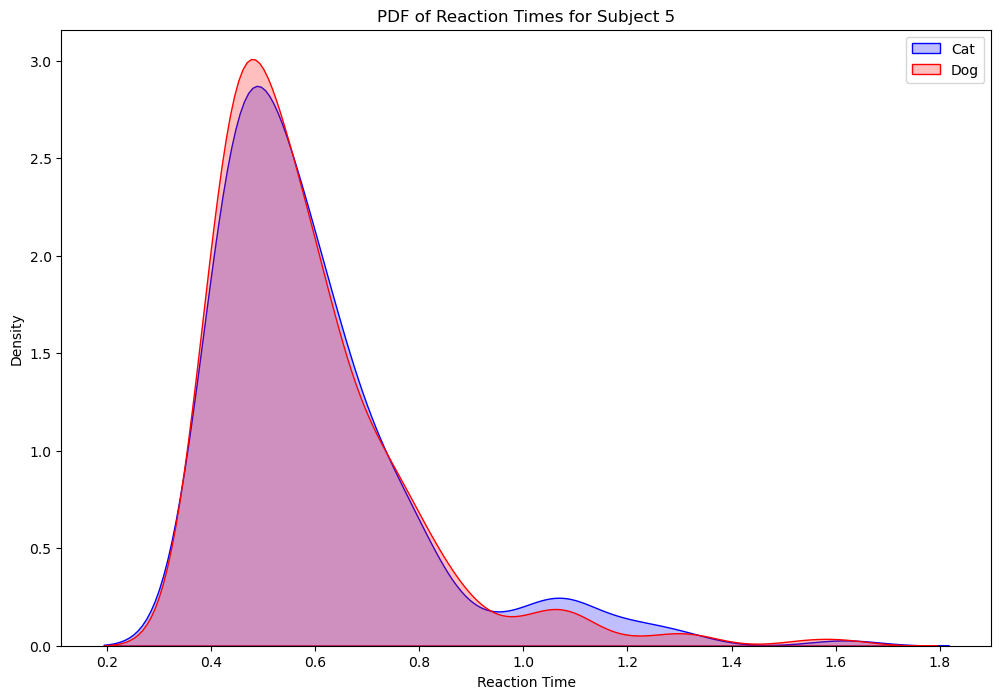

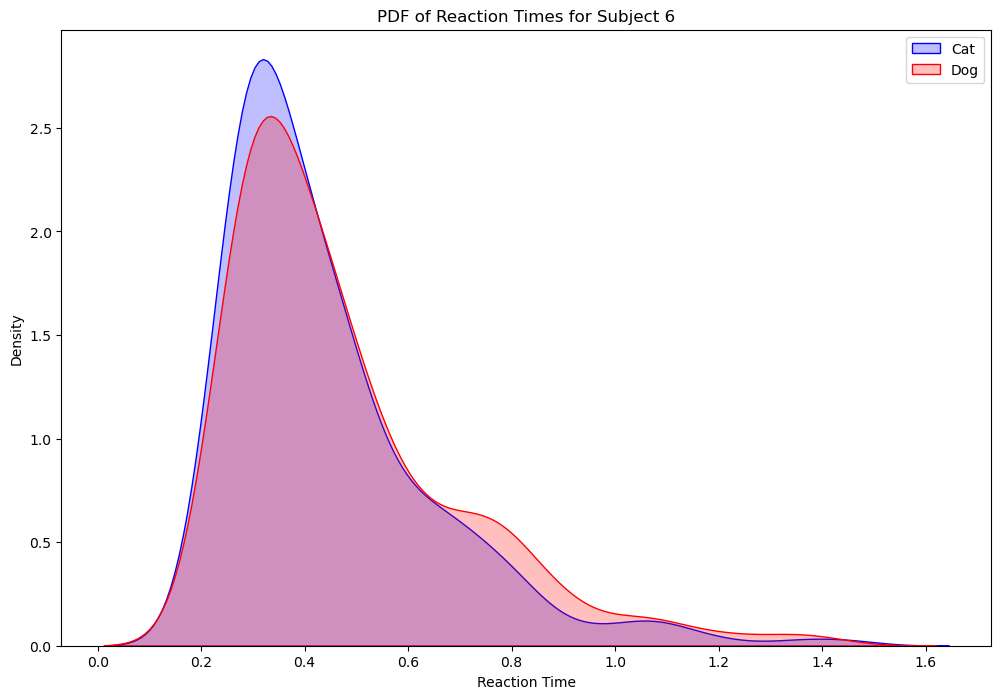

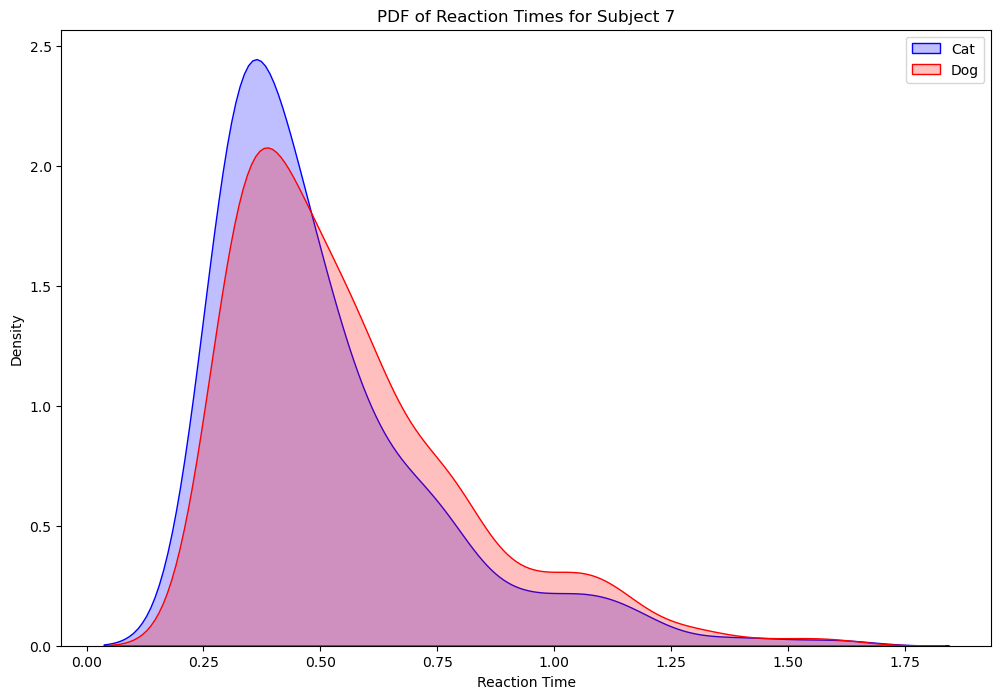

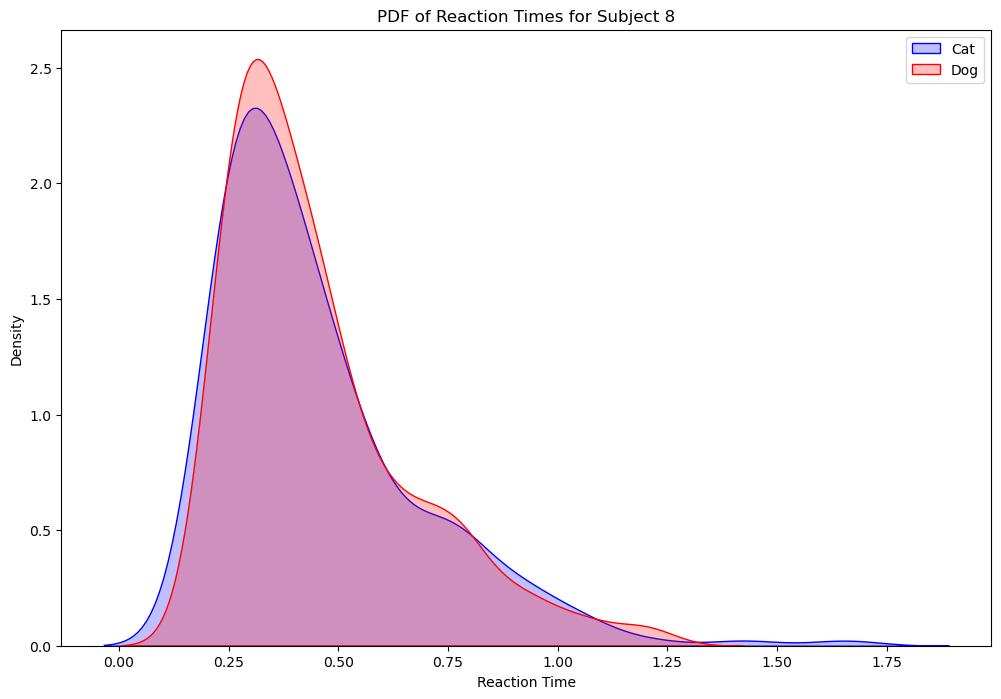

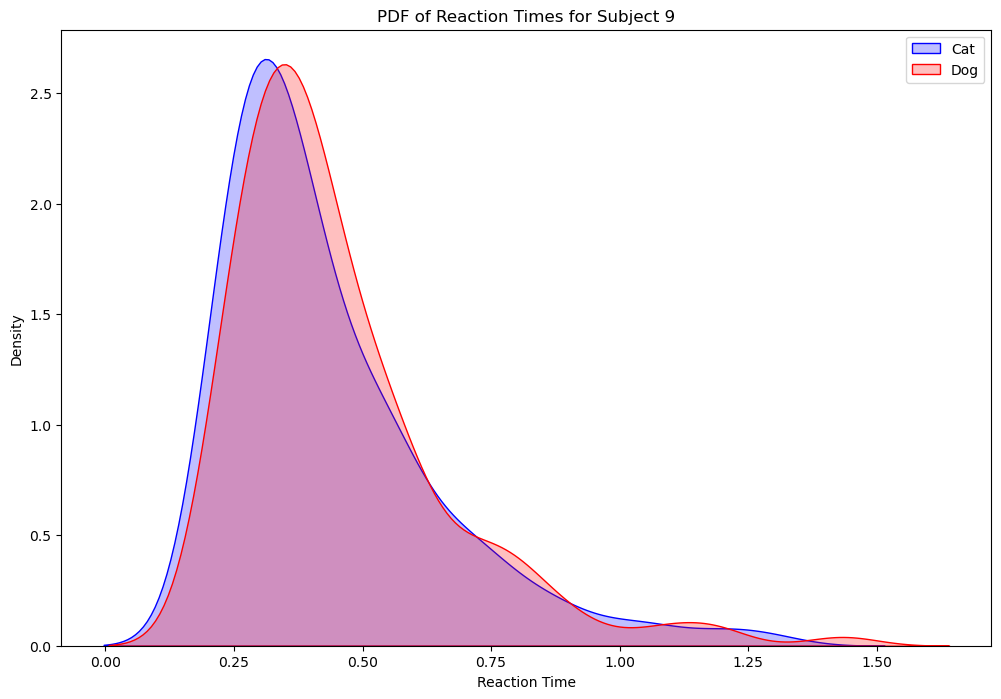

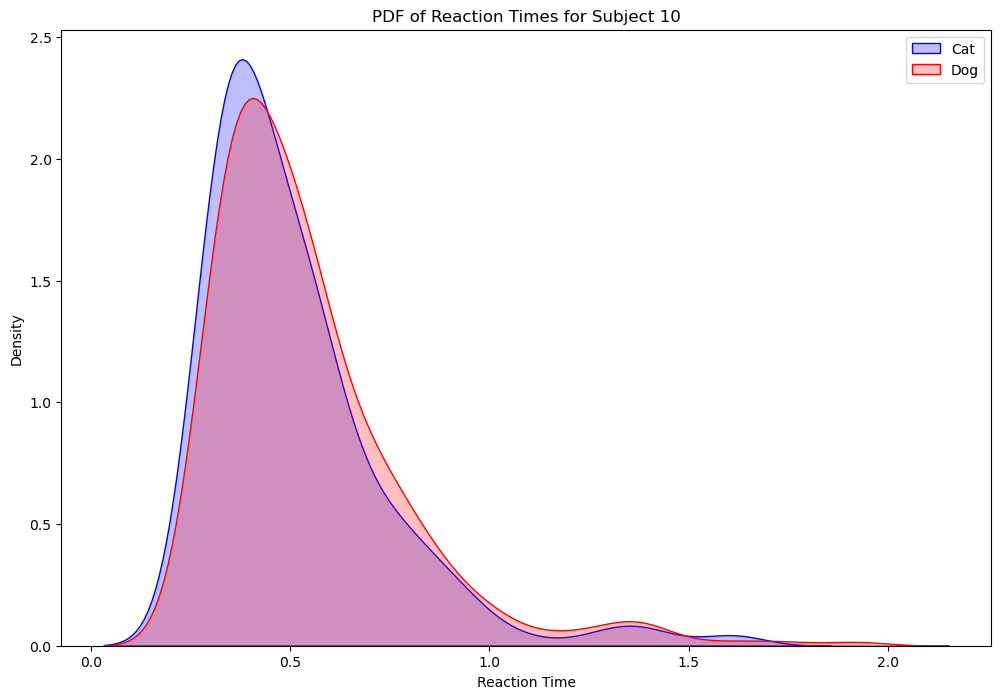

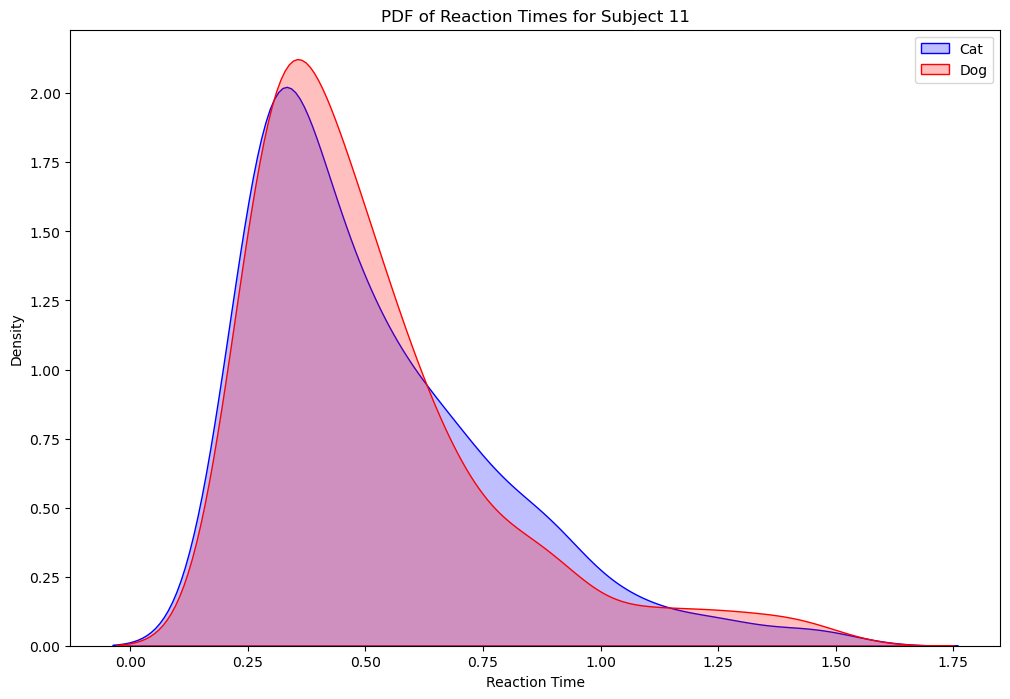

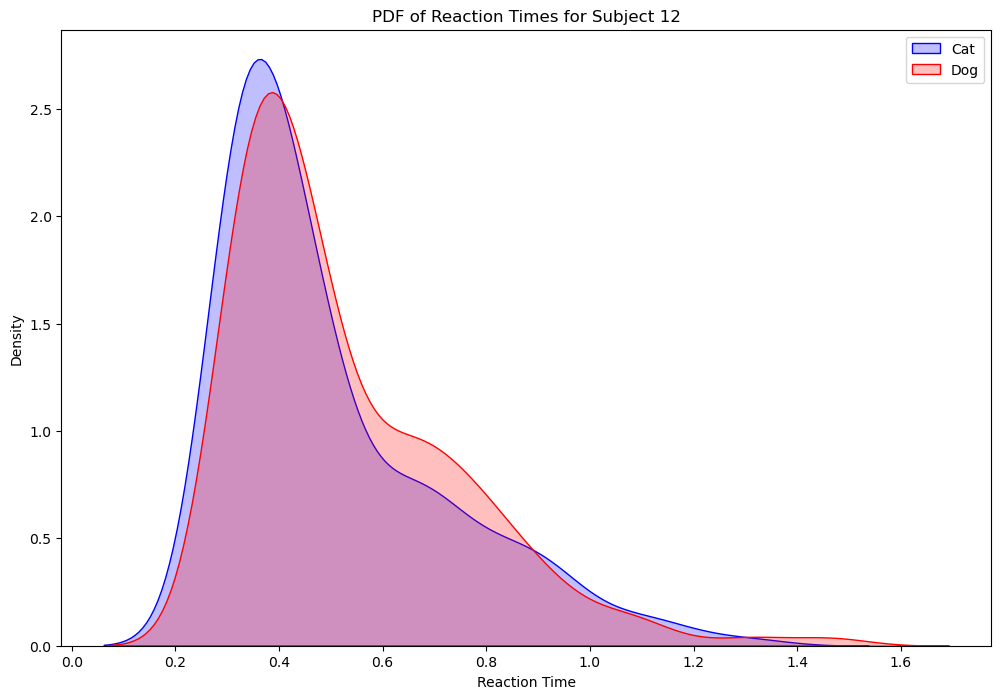

In [127]:
"""plot cat vs dog rts"""
# Filter for correct responses
correct_responses = df[df['R'] ==0]

# Filter for incorrect responses
incorrect_responses = df[df['R'] == df['S']]

t_stat, p_value = ttest_ind(correct_responses['rt'], incorrect_responses['rt'], equal_var=False)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
#significant, but negligible difference in reaction times between correct and incorrect responses


# PDF of reaction times by subject for all incorrect vs. correct responses
print(f"cat responses mean: {correct_responses['rt'].mean()}")
print(f"dog responses mean: {incorrect_responses['rt'].mean()}")
plt.figure(figsize=(12, 8))
sns.kdeplot(data=correct_responses, x='rt', color='blue', fill=True)
sns.kdeplot(data=incorrect_responses, x='rt', color= 'red', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('PDF of Reaction Times (Cat vs. Dog Responses)')
plt.legend(['Cat', 'Dog'])
plt.show()

# PDF of reaction times by subject for correct vs. incorrect responses
for i in df.subjects.unique():
    plt.figure(figsize=(12, 8))
    sns.kdeplot(data=correct_responses[correct_responses["subjects"]==i], x='rt', color='blue', fill=True, label='Cat')
    sns.kdeplot(data=incorrect_responses[incorrect_responses["subjects"]==i], color='red', x='rt', fill=True, label='Dog')
    plt.xlabel('Reaction Time')
    plt.ylabel('Density')
    plt.title(f'PDF of Reaction Times for Subject {i}')
    plt.legend(['Cat', 'Dog'])
    plt.legend()
    plt.show()
    

mean of correct congruent trials: 0.5264199646855924
mean of correct incongruent trials: 0.46237023796405224
mean of incorrect congruent trials: 0.44800761677701273
mean of incorrect incongruent trials: 0.5101544426260605
___________________________
mean of 'c,c,meow' trials: 0.5055430577922394
mean of 'd,d,woof' trials: 0.5514669743465179
mean of 'd,d,meow' trials: 0.4851786613916865
mean of 'c,c,woof' trials: 0.44123020847232813
mean of 'd,c,meow' trials: 0.48436136101603683
mean of 'c,d,woof' trials: 0.4624276422917278
mean of 'c,d,woof' trials: 0.4624276422917278
mean of 'd,c,meow' trials: 0.48436136101603683


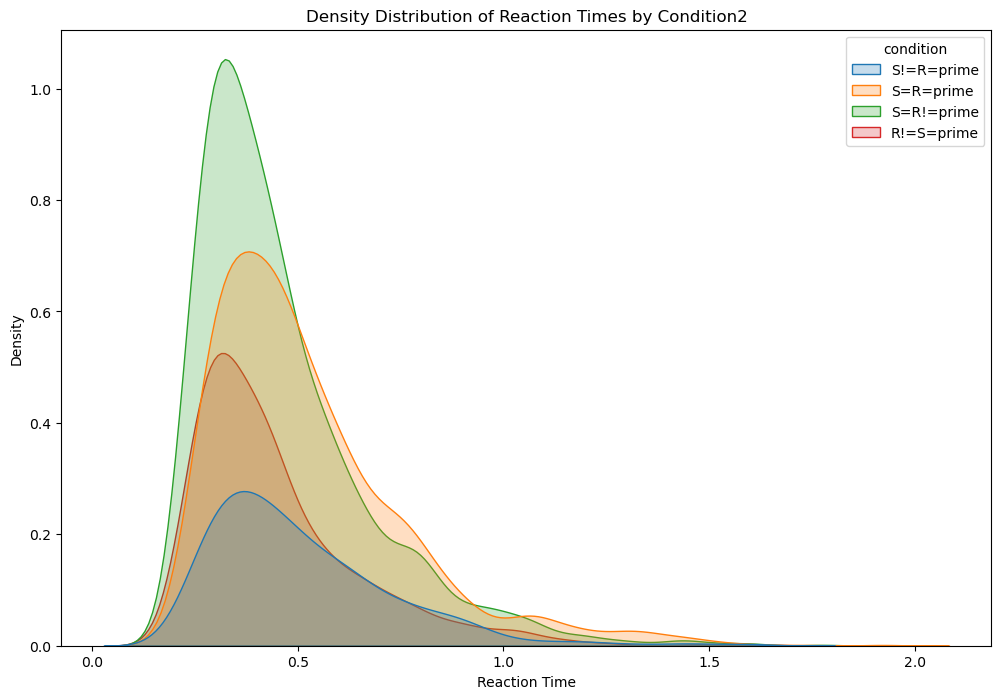

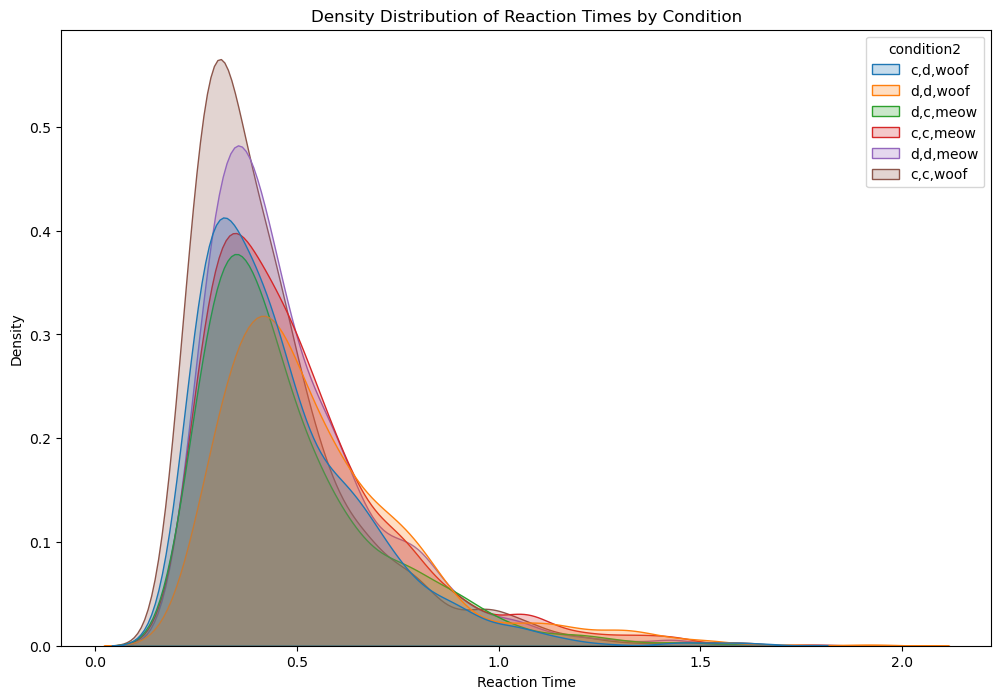

condition
S=R!=prime    2081
S=R=prime     1740
R!=S=prime    1015
S!=R=prime     678
Name: count, dtype: int64
s=cat, prime=MEOW: 1379
s=cat, prime=WOOF: 1380
s=dog, prime=MEOW: 1379
s=dog, prime=WOOF: 1376


In [128]:
# Create a new column to categorize the conditions under assumption cat=dog
df['condition'] = 'Other'

# S=R=prime
df.loc[(df['prime'] == 1) & (df['R'] == 1) & (df['S'] == 1), 'condition'] = 'S=R=prime'
df.loc[(df['prime'] == 0) & (df['R'] == 0) & (df['S'] == 0), 'condition'] = 'S=R=prime'
#S=R!=prime
df.loc[(df['prime'] == 0) & (df['R'] == 1) & (df['S'] == 1), 'condition'] = 'S=R!=prime'
df.loc[(df['prime'] == 1) & (df['R'] == 0) & (df['S'] == 0), 'condition'] = 'S=R!=prime'
#R!=S=prime
df.loc[(df['prime'] == 0) & (df['R'] == 1) & (df['S'] == 0), 'condition'] = 'R!=S=prime'
df.loc[(df['prime'] == 1) & (df['R'] == 0) & (df['S'] == 1), 'condition'] = 'R!=S=prime'
#S!=R=prime
df.loc[(df['prime'] == 1) & (df['R'] == 1) & (df['S'] == 0), 'condition'] = 'S!=R=prime'
df.loc[(df['prime'] == 0) & (df['R'] == 0) & (df['S'] == 1), 'condition'] = 'S!=R=prime'


print(f"mean of correct congruent trials: {df[df['condition'] == 'S=R=prime']['rt'].mean()}")
print(f"mean of correct incongruent trials: {df[df['condition'] == 'S=R!=prime']['rt'].mean()}")    
print(f"mean of incorrect congruent trials: {df[df['condition'] == 'R!=S=prime']['rt'].mean()}")
print(f"mean of incorrect incongruent trials: {df[df['condition'] == 'S!=R=prime']['rt'].mean()}")
# Create a new column to categorize the conditions under assumption cat!=dog
df['condition2'] = 'Other'

# S=R=prime
df.loc[(df['prime'] == 1) & (df['R'] == 1) & (df['S'] == 1), 'condition2'] = 'd,d,woof'
df.loc[(df['prime'] == 0) & (df['R'] == 0) & (df['S'] == 0), 'condition2'] = 'c,c,meow'
#S=R!=prime
df.loc[(df['prime'] == 0) & (df['R'] == 1) & (df['S'] == 1), 'condition2'] = 'd,d,meow'
df.loc[(df['prime'] == 1) & (df['R'] == 0) & (df['S'] == 0), 'condition2'] = 'c,c,woof'
#R!=S=prime
df.loc[(df['prime'] == 0) & (df['R'] == 1) & (df['S'] == 0), 'condition2'] = 'd,c,meow'
df.loc[(df['prime'] == 1) & (df['R'] == 0) & (df['S'] == 1), 'condition2'] = 'c,d,woof'
#S!=R=prime
df.loc[(df['prime'] == 1) & (df['R'] == 1) & (df['S'] == 0), 'condition2'] = 'c,d,woof'
df.loc[(df['prime'] == 0) & (df['R'] == 0) & (df['S'] == 1), 'condition2'] = 'd,c,meow'


print("___________________________")
print(f"mean of 'c,c,meow' trials: {df[df['condition2'] == 'c,c,meow']['rt'].mean()}")
print(f"mean of 'd,d,woof' trials: {df[df['condition2'] == 'd,d,woof']['rt'].mean()}")
print(f"mean of 'd,d,meow' trials: {df[df['condition2'] == 'd,d,meow']['rt'].mean()}")
print(f"mean of 'c,c,woof' trials: {df[df['condition2'] == 'c,c,woof']['rt'].mean()}")
print(f"mean of 'd,c,meow' trials: {df[df['condition2'] == 'd,c,meow']['rt'].mean()}")
print(f"mean of 'c,d,woof' trials: {df[df['condition2'] == 'c,d,woof']['rt'].mean()}")
print(f"mean of 'c,d,woof' trials: {df[df['condition2'] == 'c,d,woof']['rt'].mean()}")
print(f"mean of 'd,c,meow' trials: {df[df['condition2'] == 'd,c,meow']['rt'].mean()}")

# Plot the density distribution of reaction times for each condition2
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='rt', hue='condition', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times by Condition2')
plt.show()



# Plot the density distribution of reaction times for each condition under assumption that cat=dog
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='rt', hue='condition2', fill=True)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.title('Density Distribution of Reaction Times by Condition')
plt.show()
# Calculate the absolute occurrences of each category for 
category_counts = df['condition'].value_counts()
print(category_counts)



# Checking if initial distribution of meow, woof, cat, dog is balanced

# Count the occurrences for each combination of 'S' and 'prime'
s_cat_prime_meow = df[(df['S'] == 0) & (df['prime'] == 0)].shape[0]
s_cat_prime_woof = df[(df['S'] == 0) & (df['prime'] == 1)].shape[0]
s_dog_prime_meow = df[(df['S'] == 1) & (df['prime'] == 0)].shape[0]
s_dog_prime_woof = df[(df['S'] == 1) & (df['prime'] == 1)].shape[0]

print(f"s=cat, prime=MEOW: {s_cat_prime_meow}")
print(f"s=cat, prime=WOOF: {s_cat_prime_woof}")
print(f"s=dog, prime=MEOW: {s_dog_prime_meow}")
print(f"s=dog, prime=WOOF: {s_dog_prime_woof}")
# The distribution is balanced




In [129]:
list = [
    ('c,c,woof', 'd,d,meow'),
    ('c,c,meow', 'd,d,woof'),
    ('d,c,meow', 'c,d,woof'),
    ('c,d,woof', 'd,c,meow')
]

for condition1, condition2 in list:
    # Get the reaction times for the two conditions
    rt_condition1 = df[df['condition2'] == condition1]['rt']
    rt_condition2 = df[df['condition2'] == condition2]['rt']

    # Ensure the arrays have the same length by sampling from the larger array
    min_length = min(len(rt_condition1), len(rt_condition2))
    rt_condition1 = rt_condition1.sample(min_length, random_state=1)
    rt_condition2 = rt_condition2.sample(min_length, random_state=1)

    # Perform the t-test
    t_stat, p_value = ttest_rel(rt_condition1, rt_condition2)

    # Output the results
    print(f"T-test for {condition1} vs {condition2}")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print('-------------------------')


list = [
    ('c,c,woof', 'd,d,meow'),
    ('c,c,meow', 'd,d,woof'),
    ('d,c,meow', 'c,d,woof'),
    ('c,d,woof', 'd,c,meow'),
    ('c,d,meow', 'd,c,meow'),
]
for condition1, condition2 in list:
    avg_rt_condition1 = df[df['condition2'] == condition1]['rt'].mean()
    avg_rt_condition2 = df[df['condition2'] == condition2]['rt'].mean()
    print(f"Overall Average RT for {condition1}: {avg_rt_condition1}")
    print(f"Overall Average RT for {condition2}: {avg_rt_condition2}")
    print('-------------------------')
    


T-test for c,c,woof vs d,d,meow
T-statistic: -4.538603151792849
P-value: 6.350796343298829e-06
-------------------------
T-test for c,c,meow vs d,d,woof
T-statistic: -4.140870610742667
P-value: 3.832356444436035e-05
-------------------------
T-test for d,c,meow vs c,d,woof
T-statistic: 2.1706017438630565
P-value: 0.03025220193922489
-------------------------
T-test for c,d,woof vs d,c,meow
T-statistic: -2.1706017438630565
P-value: 0.03025220193922489
-------------------------
Overall Average RT for c,c,woof: 0.44123020847232813
Overall Average RT for d,d,meow: 0.4851786613916865
-------------------------
Overall Average RT for c,c,meow: 0.5055430577922394
Overall Average RT for d,d,woof: 0.5514669743465179
-------------------------
Overall Average RT for d,c,meow: 0.48436136101603683
Overall Average RT for c,d,woof: 0.4624276422917278
-------------------------
Overall Average RT for c,d,woof: 0.4624276422917278
Overall Average RT for d,c,meow: 0.48436136101603683
----------------------

This indicates that the assumption of cat=dog does not hold. 
Answers are biased towards cat.


In [130]:
# Create T-test to check signifance of the difference in reaction times between "S=R!=prime" and "S=R=prime"

t_stat, p_value = ttest_ind(df[df['condition']=='S=R=prime']['rt'], df[df['condition']=='S=R!=prime']['rt'], equal_var=False)  # Use equal_var=False for Welch's t-test

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 8.670404174621057
P-value: 6.4643002587957835e-18


In [131]:
c1 = df[df['condition']=='S=R=prime']['rt'] 
c2 = df[df['condition']=='S=R!=prime']['rt']
t_stat, p_value = mannwhitneyu(c1, c2, alternative='two-sided')  # Use equal_var=False for Welch's t-test

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 2149461.0
P-value: 1.8255172401313574e-23


# ANALYSIS 
A bit weird that "S=R!=prime" gets the best reaction times, when it should be lower than "S=R=prime". There is probably a significant differenc.


In [132]:

# Create a contingency table with S, R, and prime
#contingency_table = pd.crosstab(index=[df['S'], df['R'],df['prime']], columns=[df['S'], df['R'],df['prime']])

contingency_table1 = pd.crosstab(df['S'], df['R'])
contingency_table2 = pd.crosstab(df['S'], df['prime'])
contingency_table3 = pd.crosstab(df['R'], df['prime']) #shows that there is a bias towards cats, cats been chosen more.
# Separate reaction times for cat and dog
#print(f"meow, cat {len(df[(df['R'] == 1) & (df['prime'] == 1)])} ")
table = pd.crosstab(df['S'], [df['R'], df['prime']], rownames=['S'], colnames=['R', 'prime'])
print(table)

# Calculate the percentage of cat responses per subject
cat_percentage_per_subject = df[df['R'] == 0].groupby('subjects').size() / df.groupby('subjects').size() * 100
# percentage of cat responses per subject
print("percentage of cat responses per subject:")
print(cat_percentage_per_subject)
# Perform t-test
t_stat, p_value = ttest_1samp(cat_percentage_per_subject, 50) #typo
print('_________________________')
print("T-test for the percentage of cat responses per subject:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
# Display the contingency table

contingency_table3


R        0           1     
prime    0     1     0    1
S                          
0      949  1080   430  300
1      378   585  1001  791
percentage of cat responses per subject:
subjects
1     54.782609
2     56.304348
3     56.550218
4     53.260870
5     47.608696
6     60.434783
7     52.287582
8     50.873362
9     55.869565
10    53.260870
11    51.851852
12    58.043478
dtype: float64
_________________________
T-test for the percentage of cat responses per subject:
T-statistic: 4.2587
P-value: 0.0013


prime     0     1
R                
0      1327  1665
1      1431  1091

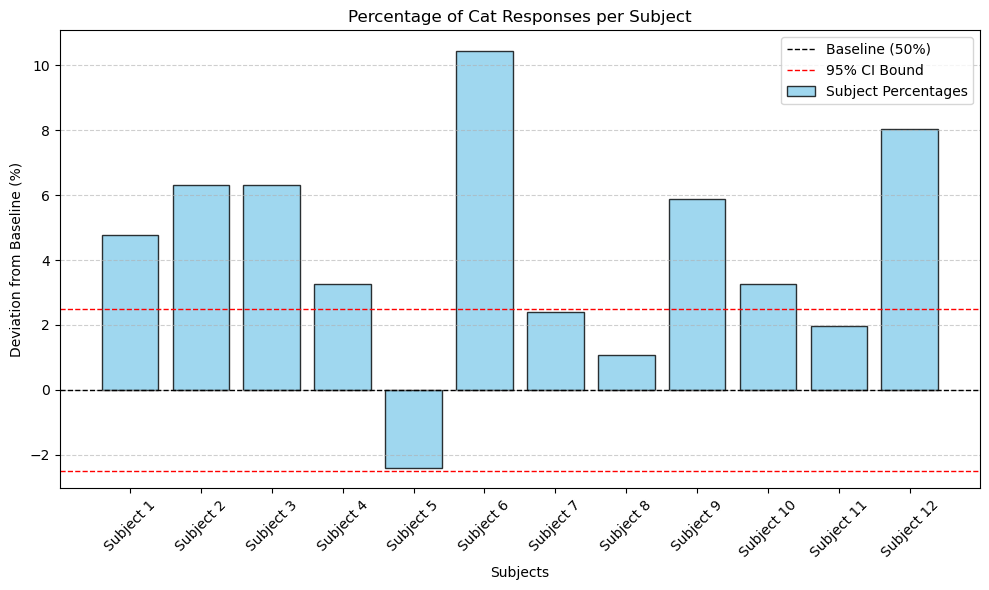

In [133]:
# Cat bias plot
subjects = np.arange(1, 13)  
percentages = np.array([54.78, 56.30, 56.30, 53.26, 47.61, 60.43, 52.39, 51.09, 55.87, 53.26, 51.96, 58.04])

# Baseline and confidence intervals
baseline = 50  
lower_bound = 47.5  
upper_bound = 52.5  

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(subjects, percentages - baseline, color="skyblue", edgecolor="black", alpha=0.8, label="Subject Percentages")
plt.axhline(0, color="black", linestyle="--", linewidth=1, label="Baseline (50%)")
plt.axhline(lower_bound - baseline, color="red", linestyle="--", linewidth=1, label="95% CI Bound")
plt.axhline(upper_bound - baseline, color="red", linestyle="--", linewidth=1)

# Annotations and formatting
plt.xticks(subjects, labels=[f"Subject {i}" for i in subjects], rotation=45)
plt.ylabel("Deviation from Baseline (%)")
plt.xlabel("Subjects")
plt.title("Percentage of Cat Responses per Subject")
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

In [134]:
ttest_1samp(cat_percentage_per_subject, 50)

TtestResult(statistic=4.258650399094807, pvalue=0.0013460517105765694, df=11)

Yet again, probably significant difference. 

# DONE WITH STATS

In [135]:
# Prepare data for pyddm
sample = Sample.from_pandas_dataframe(df, rt_column_name="rt", correct_column_name="R")


In [136]:
# Group the dataframe by 'subjects' and create a dictionary of dataframes
subject_trials = {subject: data for subject, data in df.groupby('subjects')}  
 # Create a sample for each subject using the data of the trials
subject_samples = {subject: Sample.from_pandas_dataframe(data, rt_column_name="rt", choice_column_name="R") for subject, data in subject_trials.items()}


In [137]:
'''Classes for DDM paras'''

# Drift depends on prime
class DriftCondition(Drift):
    name = "Drift depends on prime condition"
    required_parameters = ['v_drift', 'v_diff']  # Parameters to fit
    required_conditions = ['S', 'prime']    # Experimental conditions

    def get_drift(self, conditions, **kwargs):
        if conditions['S'] == 0:
            drift = self.v_drift
        else:
            drift = -self.v_drift
            
        if conditions['prime'] == 0:  # MEOW
            drift += self.v_diff
        else:  # WOOF
            drift -= self.v_diff
        return drift

# Bound depends on prime
class BoundCondition(Bound):
    name = "Boundary depends on prime condition"
    required_parameters = ['a_bound', 'a_diff']
    required_conditions = ['prime']

    def get_bound(self, conditions, **kwargs):
        if conditions['prime'] == 0:  # MEOW
            return self.a_bound + self.a_diff
        else:  # WOOF
            return self.a_bound - self.a_diff
    
# Starting point depends on prime

class ICCondition(InitialCondition):
    name = "Starting point depends on prime condition"
    required_parameters = ['z_start']
    required_conditions = ['prime']

    def get_IC(self, x, dx, conditions, **kwargs):
        # Determine the starting point based on the condition code
        if conditions['prime'] == 0:  # MEOW
            z = self.z_start #0.5 + self.z_start #if it is arange from 0 to a
        else:  # WOOF
            z = -1*self.z_start
        ic_array = np.zeros_like(x)
        idx = np.argmin(np.abs(x - z))
        ic_array[idx] = 1 / dx  # normalize so sum= 1
        
        return ic_array

In [138]:
"""Model creation"""
# H1: Create a model with drift not varying by condition
model_v= Model(name='DDM varying by condition',
                drift=DriftCondition(v_drift=Fittable(minval=-3, maxval=3), v_diff=Fittable(minval=-3, maxval=3)),
                noise=NoiseConstant(noise=1.0),
                bound=BoundCondition(a_bound=Fittable(minval=0.25, maxval=2.0), a_diff=Fittable(minval=-0.1, maxval=0.2)), 
                overlay=OverlayNonDecision(nondectime=Fittable(minval=0, maxval=1)), 
                IC=ICCondition(z_start=Fittable(minval=-0.5, maxval=0.5)))

In [139]:
'''Plotting for all subjects'''
np.random.seed(1)
fit_model= pyddm.fit_adjust_model(model=model_v, sample=sample, lossfunction=pyddm.LossLikelihood, verbose=False) #or LossRobustLikelihood
model_gui_jupyter(model=fit_model, sample=sample)


/opt/anaconda3/envs/ML_assignment_4/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
Info: Params [-0.74981115  0.04422402  0.56274903  0.01374228  0.06239614  0.19033164] gave 1449.9653720771416


Output()

In [140]:

np.random.seed(1)

all_fitted_params = {
    "drift.v_drift": [],
    "drift.v_diff": [],
    "bound.a_bound": [],
    "bound.a_diff": [],
    "IC.z_start": [],
    "overlay.nondectime": []
}

for subject, sample in subject_samples.items():
    print(f"Processing subject {subject}...")

    # Fit model_v
    print(f"Fitting model_v for subject {subject}...")
    fit_model_v = pyddm.fit_adjust_model(model=model_v, sample=sample, lossfunction=pyddm.LossLikelihood, verbose=False) #ROBUSTLIKELIHOOD


    # Extract parameters dynamically
    drift = fit_model_v._driftdep
    bound = fit_model_v._bounddep
    ic = fit_model_v._IC
    overlay = fit_model_v._overlay

    # Append parameter values using `float()`
    all_fitted_params["drift.v_drift"].append(float(drift.v_drift))
    all_fitted_params["drift.v_diff"].append(float(drift.v_diff))
    all_fitted_params["bound.a_bound"].append(float(bound.a_bound))
    all_fitted_params["bound.a_diff"].append(float(bound.a_diff))
    all_fitted_params["IC.z_start"].append(float(ic.z_start))
    all_fitted_params["overlay.nondectime"].append(float(overlay.nondectime))

    print(f"Fitted parameters for subject {subject}:")
    print(f"  drift.v_drift: {float(drift.v_drift)}")
    print(f"  drift.v_diff: {float(drift.v_diff)}")
    print(f"  bound.a_bound: {float(bound.a_bound)}")
    print(f"  bound.a_diff: {float(bound.a_diff)}")
    print(f"  IC.z_start: {float(ic.z_start)}")
    print(f"  overlay.nondectime: {float(overlay.nondectime)}")

    #z_start_values.append(fit_model_v.IC.z_start.value())
    # print(f"z_start: {fit_model_v.IC.z_start.value()}")
    # print(f"a_bound: {fit_model_v.bound.B.value()}")
    # print(f"v_drift: {fit_model_v.drift.v_drift.value()}")
    # a_bound_values.append(fit_model_v.bound.B.value())
    # v_drift_values.append(fit_model_v.drift.v_drift.value())
    model_name_v = f"model_v_{subject}"
    globals()[model_name_v] = fit_model_v
    model_gui_jupyter(model=fit_model_v, sample=sample)
    print(f"Finished fitting {model_name_v}.")
    print(f"Finished processing subject {subject}.")


print("__________________________________")
print("All fitted averaged parameters:")
for para, values in all_fitted_params.items():
    print(f"{para}: {np.mean(values)}")


Processing subject 1...
Fitting model_v for subject 1...


Info: Params [-0.68483619  0.01046931  0.48646843  0.03012741  0.12351805  0.19890361] gave -14.109728346962093


Fitted parameters for subject 1:
  drift.v_drift: -0.6848361884519535
  drift.v_diff: 0.010469306551346015
  bound.a_bound: 0.48646843084328406
  bound.a_diff: 0.030127413349094988
  IC.z_start: 0.12351805165876606
  overlay.nondectime: 0.19890361344346819


Output()

Finished fitting model_v_1.
Finished processing subject 1.
Processing subject 2...
Fitting model_v for subject 2...


Info: Params [-0.85148329  0.14554137  0.43574666  0.00180684  0.08034472  0.19164706] gave -98.18800917601217


Fitted parameters for subject 2:
  drift.v_drift: -0.8514832906667118
  drift.v_diff: 0.14554137246431176
  bound.a_bound: 0.435746664307338
  bound.a_diff: 0.00180683859322351
  IC.z_start: 0.08034472127831038
  overlay.nondectime: 0.19164705712822128


Output()

Finished fitting model_v_2.
Finished processing subject 2.
Processing subject 3...
Fitting model_v for subject 3...


Info: Params [-0.82941253  0.1386858   0.55983813 -0.01085326 -0.01750577  0.18675898] gave 124.27377224606454


Fitted parameters for subject 3:
  drift.v_drift: -0.8294125290478432
  drift.v_diff: 0.1386857994281092
  bound.a_bound: 0.5598381283215117
  bound.a_diff: -0.010853260306890579
  IC.z_start: -0.017505767514751858
  overlay.nondectime: 0.18675898006200864


Output()

Finished fitting model_v_3.
Finished processing subject 3.
Processing subject 4...
Fitting model_v for subject 4...


Info: Params [-0.68524658 -0.18068445  0.47495388  0.02786348  0.18190436  0.26875824] gave -71.60436879164511


Fitted parameters for subject 4:
  drift.v_drift: -0.6852465835024899
  drift.v_diff: -0.18068445146434375
  bound.a_bound: 0.4749538791975014
  bound.a_diff: 0.02786347579454529
  IC.z_start: 0.18190435702828178
  overlay.nondectime: 0.2687582432693308


Output()

Finished fitting model_v_4.
Finished processing subject 4.
Processing subject 5...
Fitting model_v for subject 5...


Info: Params [-0.89398258  0.11424927  0.47713662 -0.01184489  0.08030556  0.36598821] gave -37.43872851659949


Fitted parameters for subject 5:
  drift.v_drift: -0.893982578394757
  drift.v_diff: 0.11424926535292362
  bound.a_bound: 0.47713662452150485
  bound.a_diff: -0.011844893217578666
  IC.z_start: 0.08030555904989534
  overlay.nondectime: 0.36598820762036993


Output()

Finished fitting model_v_5.
Finished processing subject 5.
Processing subject 6...
Fitting model_v for subject 6...


Info: Params [-0.54634547 -0.02302897  0.51450006  0.00436574 -0.0218382   0.20616549] gave 105.92006200263708


Fitted parameters for subject 6:
  drift.v_drift: -0.5463454735606879
  drift.v_diff: -0.02302897283341068
  bound.a_bound: 0.5145000601569154
  bound.a_diff: 0.004365737021217599
  IC.z_start: -0.021838200321984025
  overlay.nondectime: 0.20616549455838212


Output()

Finished fitting model_v_6.
Finished processing subject 6.
Processing subject 7...
Fitting model_v for subject 7...


Info: Params [-1.24213297 -0.13401096  0.6018288   0.02961186  0.21458388  0.26095871] gave 24.857806951224628


Fitted parameters for subject 7:
  drift.v_drift: -1.2421329666427199
  drift.v_diff: -0.13401096419558667
  bound.a_bound: 0.601828797752628
  bound.a_diff: 0.029611856928013037
  IC.z_start: 0.21458388246250426
  overlay.nondectime: 0.26095871252415465


Output()

Finished fitting model_v_7.
Finished processing subject 7.
Processing subject 8...
Fitting model_v for subject 8...


Info: Params [-1.35495054  0.08231996  0.5643398   0.0072811   0.03823989  0.17693863] gave 20.903809179334395


Fitted parameters for subject 8:
  drift.v_drift: -1.3549505417650467
  drift.v_diff: 0.08231995524517066
  bound.a_bound: 0.5643397980977093
  bound.a_diff: 0.007281099481730911
  IC.z_start: 0.038239889930378634
  overlay.nondectime: 0.17693863470607996


Output()

Finished fitting model_v_8.
Finished processing subject 8.
Processing subject 9...
Fitting model_v for subject 9...


Info: Params [-0.61302504 -0.23039663  0.53894164  0.01518586  0.14515057  0.1902764 ] gave 86.39140086437803


Fitted parameters for subject 9:
  drift.v_drift: -0.6130250372705534
  drift.v_diff: -0.23039662671814606
  bound.a_bound: 0.5389416387322827
  bound.a_diff: 0.015185861280523918
  IC.z_start: 0.1451505746396734
  overlay.nondectime: 0.1902763988384526


Output()

Finished fitting model_v_9.
Finished processing subject 9.
Processing subject 10...
Fitting model_v for subject 10...


Info: Params [-0.96259494  0.00347795  0.57157398 -0.01016496 -0.05410162  0.24129793] gave 108.29874203751089


Fitted parameters for subject 10:
  drift.v_drift: -0.9625949416180745
  drift.v_diff: 0.0034779451014672644
  bound.a_bound: 0.5715739768937732
  bound.a_diff: -0.01016495896591716
  IC.z_start: -0.05410162362302284
  overlay.nondectime: 0.24129792925811944


Output()

Finished fitting model_v_10.
Finished processing subject 10.
Processing subject 11...
Fitting model_v for subject 11...


Info: Params [-0.28473597 -0.11690905  0.54415964  0.00111898  0.11101173  0.20600331] gave 161.47415982701332


Fitted parameters for subject 11:
  drift.v_drift: -0.2847359682506482
  drift.v_diff: -0.11690904772031774
  bound.a_bound: 0.5441596421721386
  bound.a_diff: 0.0011189811601090768
  IC.z_start: 0.11101173389625685
  overlay.nondectime: 0.20600330894821028


Output()

Finished fitting model_v_11.
Finished processing subject 11.
Processing subject 12...
Fitting model_v for subject 12...


Info: Params [-0.70650611 -0.17333528  0.53819078  0.02317193  0.09852887  0.25882535] gave 104.01024911523275


Fitted parameters for subject 12:
  drift.v_drift: -0.7065061104100351
  drift.v_diff: -0.17333528428454104
  bound.a_bound: 0.5381907799627782
  bound.a_diff: 0.023171927031010602
  IC.z_start: 0.09852887301998292
  overlay.nondectime: 0.25882535069799056


Output()

Finished fitting model_v_12.
Finished processing subject 12.
__________________________________
All fitted averaged parameters:
drift.v_drift: -0.8046043507984603
drift.v_diff: -0.03030180858941812
bound.a_bound: 0.5256398684132805
bound.a_diff: 0.008972506512423544
IC.z_start: 0.08167850429202424
overlay.nondectime: 0.22937682758789904


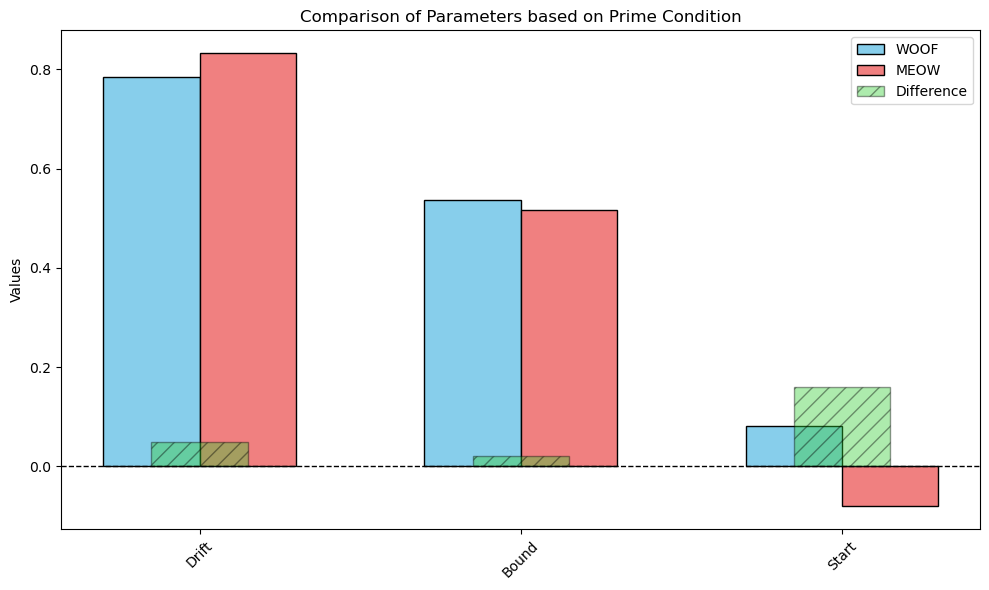

In [147]:
# Data for the bars
categories = ["Drift", "Bound", "Start"]
x = np.arange(len(categories))

# Values
v_drift = 0.8086028869289974
v_diff = 0.02464904090337026
a_bound = 0.52672360441156
a_diff = 0.01012327733486436
z_start = 0.08039996511076061

# Bar values
values_1 = [v_drift - v_diff, a_bound + a_diff, z_start]
values_2 = [v_drift + v_diff, a_bound - a_diff, -z_start]
differences = [
    abs(values_1[0] - values_2[0]),  # Drift difference
    abs(values_1[1] - values_2[1]),  # Bound difference
    abs(values_1[2] - values_2[2])   # Start difference
]

# Plotting
width = 0.3  # Width of the bars
plt.figure(figsize=(10, 6))

plt.bar(x - width / 2, values_1, width, label="WOOF", color="skyblue", edgecolor="black")
plt.bar(x + width / 2, values_2, width, label="MEOW", color="lightcoral", edgecolor="black")
plt.bar(x, differences, width, label="Difference", color="limegreen", alpha=0.4, edgecolor="black", hatch="//")

# Formatting the chart
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xticks(x, categories, rotation=45)
plt.ylabel("Values")
plt.title("Comparison of Parameters based on Prime Condition")
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [142]:
'''two parameter version'''
# # hypothesis 1: Drift depends on prime
# class DriftCondition(Drift):
#     name = "Drift depends on prime condition"
#     required_parameters = ['v_meow', 'v_woof']  # Parameters to fit
#     required_conditions = ['prime']    # Experimental conditions

#     def get_drift(self, x, t, conditions, **kwargs):
#         if conditions['prime'] == 0:  # MEOW
#             return self.v_meow
#         else:  # WOOF
#             return self.v_woof



# # hypothesis 2: Bound depends on prime
# class BoundCondition(Bound):
#     name = "Boundary depends on prime condition"
#     required_parameters = ['a_meow', 'a_woof']
#     required_conditions = ['prime']

#     def get_bound(self, x, t, conditions, **kwargs):
#         if conditions['prime'] == 0:  # MEOW
#             return self.a_meow
#         else:  # WOOF
#             return self.a_woof



# # hypothesis 3: Starting point depends on prime

# class ICCondition(InitialCondition):
#     name = "Starting point depends on prime condition"
#     required_parameters = ['z_meow', 'z_woof']
#     required_conditions = ['prime']

#     def get_IC(self, x, dx, conditions, **kwargs):
#         # Determine the starting point based on the condition code
#         if conditions['prime'] == 0:  # MEOW
#             z = self.z_meow
#         else:  # WOOF
#             z = self.z_woof
#         ic_array = np.zeros_like(x)
#         idx = np.argmin(np.abs(x - z))
#         ic_array[idx] = 1 / dx  # normalize so sum= 1
        
#         return ic_array

'two parameter version'

In [143]:
'''Two parameters varying'''

# # H1: Create a model with drift varying by condition
# model_v = Model(name='DDM with drift varying by condition',
#                 drift=DriftCondition(v_meow=Fittable(minval=-3, maxval=3),
#                                      v_woof=Fittable(minval=-3, maxval=3)),
#                 noise=NoiseConstant(noise=1.0), #Fittable(minval=0.5, maxval=4.0)),
#                 bound=BoundCondition(a_meow=Fittable(minval=0.5, maxval=3.0),
#                                     a_woof=Fittable(minval=0.5, maxval=3.0)),      
#                 overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)),
#                 IC=ICPointSourceCenter())
# fit_model_v = pyddm.fit_adjust_model(model=model_v, sample=sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)
# model_gui_jupyter(model=model_v, sample=sample)


# # H2: Create a model with boundary varying by condition
# model_a = Model(name='DDM with boundary varying by condition',
#                 drift=DriftConstant(v_meow=Fittable(minval=-3, maxval=3),
#                                      v_woof=Fittable(minval=-3, maxval=3)),   
#                 noise=NoiseConstant(noise=1.0),#Fittable(minval=0.5, maxval=3.0)),
#                 bound=BoundCondition(a_meow=Fittable(minval=0.5, maxval=3.0),
#                                     a_woof=Fittable(minval=0.5, maxval=3.0)),
#                 overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)),
#                 IC=ICPointSourceCenter())

# fit_model_a = pyddm.fit_adjust_model(model=model_a, sample=sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)
# model_gui_jupyter(model=model_a, sample=sample)


# # H3: Create a model with starting point varying by condition
# model_z = Model(name='DDM with starting point varying by condition',
#                 drift=DriftConstant(v_meow=Fittable(minval=-3, maxval=3),
#                                      v_woof=Fittable(minval=-3, maxval=3)),
#                 noise=NoiseConstant(noise=1.0),#Fittable(minval=0.5, maxval=3.0)),
#                 bound=BoundConstant(a_meow=Fittable(minval=0.5, maxval=3.0),
#                                     a_woof=Fittable(minval=0.5, maxval=3.0)),
#                 overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=0.5)), 
#                 IC=ICCondition(z_meow=Fittable(minval=-0.5, maxval=0.5),
#                                z_woof=Fittable(minval=-0.5, maxval=0.5)))

# fit_model_z = pyddm.fit_adjust_model(model=model_z, sample=sample, lossfunction=pyddm.LossRobustLikelihood, verbose=False)
# model_gui_jupyter(model=model_z, sample=sample)




'Two parameters varying'

In [144]:
"""Evaluating different models"""
# # Function to compute AIC
# def compute_aic(fit_result, num_params):
#     # Negative log-likelihood
#     likelihood = -fit_result.fitresult.value()
#     aic = 2 * num_params - 2 * likelihood
#     return aic

# # Function to compute BIC
# def compute_bic(fit_result, num_params, num_data_points):
#     # Negative log-likelihood
#     likelihood = -fit_result.fitresult.value()
#     bic = num_params * np.log(num_data_points) - 2 * likelihood
#     return bic

# # Number of parameters in each model
# num_params_v = 2  # Update with actual number of free parameters in model_v
# num_params_a = 2  # Update with actual number of free parameters in model_a
# num_params_z = 2  # Update with actual number of free parameters in model_z

# # Loop through each subject and compute AIC and BIC for each model
# for subject, sample in subject_samples.items():
#     print(f"Subject {subject}:")

#     # Retrieve fitted models
#     fit_model_v = globals().get(f"model_v_{subject}")
#     fit_model_a = globals().get(f"model_a_{subject}")
#     fit_model_z = globals().get(f"model_z_{subject}")

#     if fit_model_v and fit_model_a and fit_model_z:
#         # Compute AIC for each model
#         aic_v = compute_aic(fit_model_v, num_params_v)
#         aic_a = compute_aic(fit_model_a, num_params_a)
#         aic_z = compute_aic(fit_model_z, num_params_z)

#         # Compute BIC for each model
#         bic_v = compute_bic(fit_model_v, num_params_v, len(sample))
#         bic_a = compute_bic(fit_model_a, num_params_a, len(sample))
#         bic_z = compute_bic(fit_model_z, num_params_z, len(sample))

#         # Print the results
#         print(f"  AIC for model_v: {aic_v:.2f}")
#         print(f"  AIC for model_a: {aic_a:.2f}")
#         print(f"  AIC for model_z: {aic_z:.2f}")
#         print(f"  BIC for model_v: {bic_v:.2f}")
#         print(f"  BIC for model_a: {bic_a:.2f}")
#         print(f"  BIC for model_z: {bic_z:.2f}")
#     else:
#         print(f"Warning: Missing model fits for subject {subject}.")

#     print('-------------------------')



'Evaluating different models'

# Important info: 

1) The model has the two bounds: dog and cat are the two thresholds. so cat at -1 and dog at 1.